In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as sp_dist

In [2]:
DIR = "data/"

In [3]:
# Manhattan distance
d  = lambda p1, p2: np.linalg.norm(p1 - p2, ord=1) # Compare two points
dv = lambda v1, v2: np.sum(np.abs(v1-v2), axis=1) #  Elementwise distance
dM = lambda v1, v2: sp_dist.cdist(v1, v2, metric='cityblock') # Distance matrix 

In [4]:
def loadRequest(request):
    data = []
    file = open(request)
    for line in file:
        data.append(list(map(int, line.strip().replace("-", " ").split())))
    file.close()
    return np.array(data)

In [5]:
def plotPositions(manana, tarde, noche):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16, 5))
    ax1.scatter(manana[:,0], manana[:,1], c='y')
    ax2.scatter(tarde[:,0], tarde[:,1], c='r')
    ax3.scatter(noche[:,0], noche[:,1], c='k')
    ax1.set_title("Mañana")
    ax2.set_title("Tarde")
    ax3.set_title("Noche")
    plt.show()

In [6]:
# Load positions
manana = np.loadtxt(DIR + 'manana.dat', dtype=int)
tarde = np.loadtxt(DIR + 'tarde.dat', dtype=int)
noche = np.loadtxt(DIR + 'noche.dat', dtype=int)

In [7]:
# Load requests
req_1 = loadRequest(DIR + 'requests_1.dat')
req_2 = loadRequest(DIR + 'requests_2.dat')
req_3 = loadRequest(DIR + 'requests_3.dat')

In [15]:
def greedy(uber, request):
    T = 12001
    cand = np.copy(uber)
    request = np.copy(request)
    costs = np.zeros(T)
    serv = []
    atte_cost = 0
    serv_cost = 0
    for t in range(T):
        pos = np.where(request[:,4] == t)[0]
        req = request[:,:4]
        req_t = req[pos]
        if t % 3000 == 0: 
            print("t:", t)
            print("Candidates:", cand.shape)
            print("Requests:", req_t.shape)
            if t > 0: print("Service:", serv.shape)
        #print(cand.shape)
        if len(req_t) > 0 and len(cand) > 0:
            # Distance matrix between ubers and requests
            dist = dM(cand, req_t[:,:2])
            # Get position of ubers with min distance
            min_pos = np.argmin(dist, axis=0)
            ub_pos = cand[min_pos]
            # Remove uber from candidates
            cand = np.delete(cand, min_pos, axis=0) 
            
            #serv.append([])
            #print(cand)
            
            #costs[t] = np.sum(dist[min_pos]) + sum([d(req_t[j,:2], req_t[j,2:4]) for j in range(len(req_t))])
            #print(min_pos)
            #print(dist)
            atte_cost = np.diag(dist[min_pos]).reshape(-1, 1)
            serv_cost = dv(req_t[:,:2], req_t[:,2:4]).reshape(-1, 1)
            
            #print("atte cost", atte_cost, atte_cost.shape)
            #print("serv cost", serv_cost, serv_cost.shape)
            
            tmp = req_t[:,2:4] # The new position of uber at end of service
            #print("ts", tmp.shape)
            #print(atte_cost + serv_cost)
            tmp = np.hstack((tmp, atte_cost + serv_cost)) # Cost to compute when uber is candidate again
            #print("tmp", tmp)
            # Add uber to service
            if len(serv) == 0:
                serv = tmp
            else:
                #print("serv", serv.shape)
                #print("tmp", tmp.shape)
                serv = np.vstack((serv, tmp))
                #print("serv", serv)
                #print("tmp", tmp)
                
        #costs[t] = np.sum(atte_cost) + np.sum(serv_cost) #if t > 0 else costs[t-1] + np.sum(atte_cost) + np.sum(serv_cost)
            
        if len(serv) > 0:
            #print(t)
            #print(serv)
            serv[:,-1] -= 1
            #print(serv.shape)
            pos_serv = np.where(serv[:,2] <= 0)[0]
            #print("ps", pos_serv, len(pos_serv))
            #print("sp", serv[pos_serv])
            if len(serv[pos_serv]) > 0:#len(serv[pos_serv][0]) > 0:
                #print(t)
                #print("shape", cand.shape)
                #print(serv[pos_serv, :2], serv[pos_serv, :2].shape)
                #print("ps", pos_serv)
                
                #print("ps", pos_serv.shape)
                #print("ss", serv[pos_serv, :2].shape)
                #rint("sc", cand.shape)
                cand = np.vstack((cand, serv[pos_serv, :2]))
                serv = np.delete(serv, pos_serv, axis=0) 
                #print(cand.shape)
        #if t > 0: costs[t] += costs[t-1]; print(costs[t], costs[t-1])
            #print(min_pos)
            #print(req_t)
        
        costs[t] = np.sum(serv[:,-1]) if len(serv) > 0 else 0
    #costs2 = np.copy(costs)
    #costs[1:] += costs[:-1]
    return costs#np.cumsum(costs)#costs, costs

In [16]:
costs = greedy(tarde, req_1)

t: 0
Candidates: (200, 2)
Requests: (0, 4)
t: 3000
Candidates: (158, 2)
Requests: (1, 4)
Service: (42, 3)
t: 6000
Candidates: (170, 2)
Requests: (0, 4)
Service: (30, 3)
t: 9000
Candidates: (168, 2)
Requests: (0, 4)
Service: (32, 3)
t: 12000
Candidates: (200, 2)
Requests: (0, 4)
Service: (0, 3)


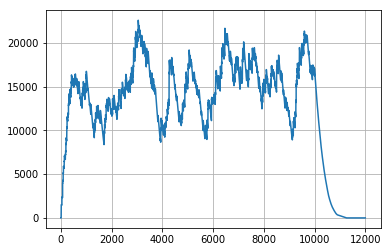

In [18]:
plt.plot(np.arange(len(costs)), costs)
plt.grid(True)
plt.show()

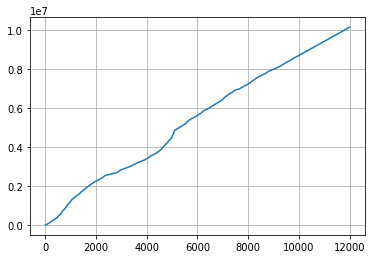

In [385]:
aa = np.copy(costs)

for i in range(1, len(aa)):
    aa[i] += aa[i-1] 
#print(len(aa[1:-1]))
#aa[1:] = costs[1:] + costs[:-1]
plt.plot(np.arange(len(costs)), aa)
plt.grid(True)
plt.show()

In [357]:
aa[:13]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466., 932.,
       932., 932.])

In [275]:
8e7

80000000.0

In [50]:
greedy(manana, req_1)

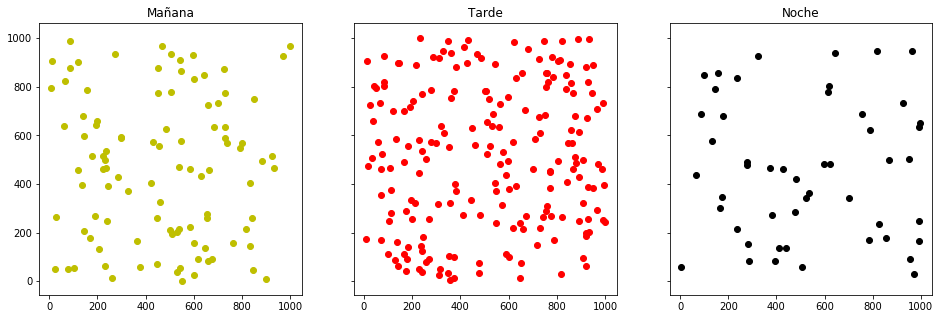

In [53]:
plotPositions(manana, tarde, noche)

In [54]:
d(manana[0], manana[1])

244.0

In [25]:
a = np.array([], shape=(1, 3))

TypeError: 'shape' is an invalid keyword argument for array()

In [26]:
a

array([1., 2., 3.])

In [20]:
a = np.append(a, [1, 2, 3])

In [21]:
a

array([1., 2., 3.])

In [22]:
np.append(a, [4, 5, 6])

array([1., 2., 3., 4., 5., 6.])